In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
data = pd.read_csv('income.csv')

In [42]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [43]:
df = pd.DataFrame(data)

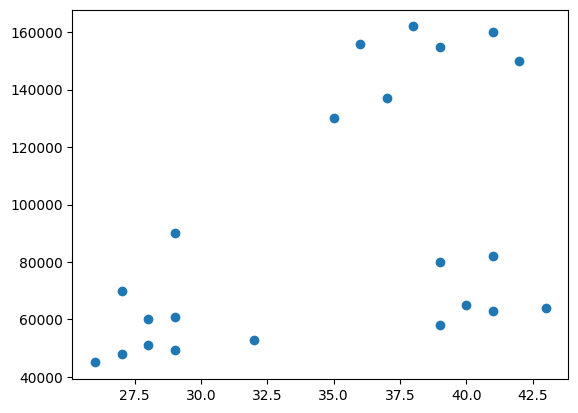

In [44]:
plt.scatter(df['Age'], df['Income($)'])

In [45]:
#As the number of clusters are clear in the graph, we give number of clusters are 3

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [46]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [47]:
df['cluster'] = y_pred

In [48]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [49]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

Text(0, 0.5, 'income')

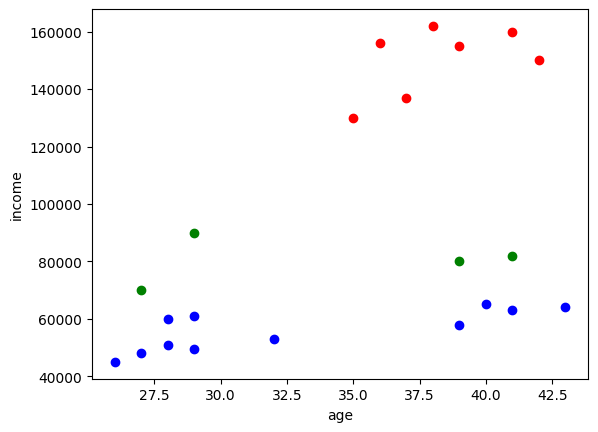

In [50]:
plt.scatter(df0['Age'], df0['Income($)'], color = 'red')
plt.scatter(df1['Age'], df1['Income($)'], color = 'blue')
plt.scatter(df2['Age'], df2['Income($)'], color = 'green')
plt.xlabel('age')
plt.ylabel('income')

In [51]:
#As the clustering is not done properly, we scale the x & y values to <1 using MinMaxScaler, predict and plot again

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [52]:
mm.fit(df[['Age']])
df['Age'] = mm.transform(df[['Age']])

In [53]:
mm.fit(df[['Income($)']])
df['Income($)'] = mm.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [58]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_pred

df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
km.cluster_centers_

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

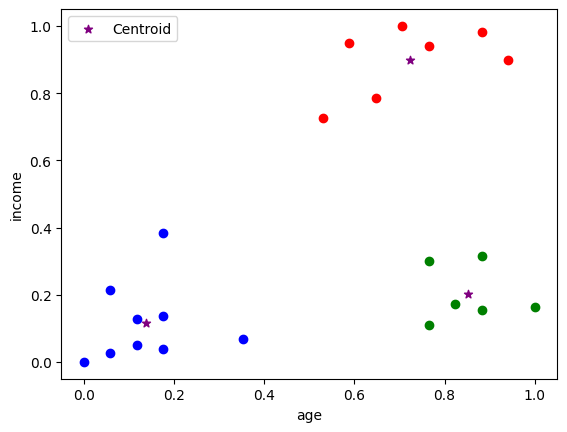

In [62]:
plt.scatter(df0['Age'], df0['Income($)'], color = 'red')
plt.scatter(df1['Age'], df1['Income($)'], color = 'blue')
plt.scatter(df2['Age'], df2['Income($)'], color = 'green')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color = 'purple', label = 'Centroid', marker = '*')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()

## Incase we don't know how many clusters to be made (ie., the number of clusters is not clearly visible in the plot), we use 'Elbow Method' to find the number of clusters to be made.

In [69]:
k_range = range(1, 10)
sse = [] #sum of squarred errors
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

In [70]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22407006551788158,
 0.17299621932455467,
 0.13265419827245162,
 0.10188787724979426]

Text(0, 0.5, 'sum of squarred error')

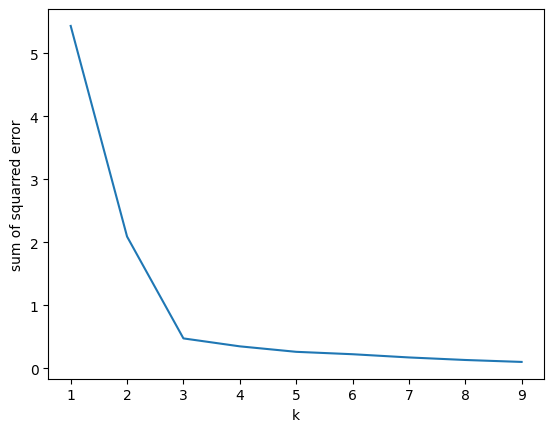

In [71]:
plt.plot(k_range, sse)
plt.xlabel('k')
plt.ylabel('sum of squarred error')

here the elbow points at three, so the number of clusters to be taken is 3